### Classification of MNIST Dataset with Convolution Neural Networks

Let's build a convolutional neural network (CNN) classifier to classify images of handwritten digits in the MNIST dataset.

The MNIST dataset contains 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction).

#### 1. Import Libraries

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Images, plots, display, and visualization
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import pandas as pd
import numpy as np
import IPython

print("TensorFlow version ", tf.__version__)
print("TensorFlow Keras version ", keras.__version__)

TensorFlow version  1.12.0
TensorFlow Keras version  2.1.6-tf


In [4]:
%matplotlib inline
style.use('ggplot')

We have successfully imported all the packages and libraries. Now let's start by downloading the dataset first.

#### 2. Load the data

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The labels are an array of integers, ranging from 0 to 9.

In [5]:
mnist = keras.datasets.mnist

"""Load the data"""
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() 

When we load the dataset. Loading the dataset returns four <i>NumPy</i> arrays:
- The train_images and train_labels array are the training set - the data the model uses to learn.
- The test_images and test_labels array are the testing set - the data against the model is tested.

In [6]:
"""Have a look on training set"""
train_images.shape

(60000, 28, 28)

We are having 60000 images in our training dataset with dimensions of size (28, 28).

In [7]:
train_labels.shape

(60000,)

We are having 60000 labels in our training dataset.

In [8]:
"""Have a look on testing set"""
test_images.shape

(10000, 28, 28)

We are having 10000 images in our testing dataset of dimensions (28, 28).

In [9]:
test_labels.shape

(10000,)

We are having 10000 lables in our testing dataset.

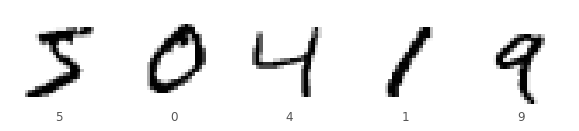

In [10]:
"""Show first new sample in the training dataset"""

def display_images(num_of_images, color_map):
    plt.figure(figsize = (10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(train_images[i], cmap = color_map)
        plt.xlabel(train_labels[i])

display_images(num_of_images = 5, color_map = plt.cm.binary)


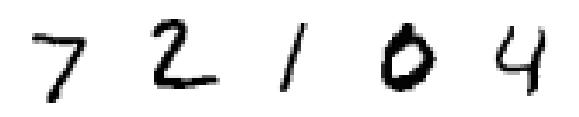

In [11]:
"""Show first new sample in the testing dataset"""

def display_images(num_of_images, color_map):
    plt.figure(figsize = (10, 2))
    for i in range(5):
        plt.subplot(1, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(test_images[i], cmap = color_map)


display_images(num_of_images = 5, color_map = plt.cm.binary)

The labels will be predicted at the end.

Know more about different color mapping [Here](https://scipy-cookbook.readthedocs.io/items/Matplotlib_Show_colormaps.html) 

<b>Let's see a single sample of our training dataset:</b>

In [12]:
"""Look at the first sample"""
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

This is how our first training sample looks like <i>an array with multiple values having range from [0, 255].

In [13]:
"""Look of the shape of the first sample"""
train_images[0].shape

(28, 28)

The shape of the sample is (28, 28).

<b>Reshape our images</b> 

In [14]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [15]:
# Look at reshaped training dataset
print("Shape of training dataset: ", train_images.shape)
print("Shape of a sample of training dataset: ", train_images[0].shape)

Shape of training dataset:  (60000, 28, 28, 1)
Shape of a sample of training dataset:  (28, 28, 1)


In [16]:
# Look at the reshaped testing dataset
print("shape of testing dataset: ", test_images.shape)
print("Shape of a sample of testing dataset: ", test_images[0].shape)

shape of testing dataset:  (10000, 28, 28, 1)
Shape of a sample of testing dataset:  (28, 28, 1)


#### 3. Feature Engineering

We scale the pixel values in a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

In [17]:
max_pixel = 255
train_images = train_images / max_pixel
test_images = test_images / max_pixel

In [18]:
"""Look at the normalized data"""
train_images[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Now, all the pixels are in the range of 0 to 1.

All done now build our model.

#### 4. Build the model

Building the neural network requires configuring the layers of the model, then compiling the model. In many cases, this can be reduced to simply stacking together layers:

In [19]:

def build_model():
    model = keras.Sequential()
    # use 32 convolution filters each of size 3x3
    model.add(layers.Conv2D(filters = 32, kernel_size = (3, 3), 
                     activation = 'relu', input_shape = train_images[0].shape))
    # choose the best feature via pooling
    model.add(layers.MaxPooling2D(pool_size = (2, 2)))
    # randomly turn neurons on and off to improve convergence
    # rate is between 0 and 1
    model.add(layers.Dropout(rate = 0.25)) # 25% of node's output set to zero randomly
    # flatten since too many dimensions, we only want to classify output
    model.add(layers.Flatten())
    # fully connected to get all revelent data
    model.add(layers.Dense(units = 128, activation = 'relu'))
    # add one more dropout
    model.add(layers.Dropout(rate = 0.5)) # 50% of output values set to zero
    # output a softmax to squash the matrix into output probabilities
    model.add(layers.Dense(units = 10, activation = 'softmax'))
    
    return model

model = build_model()

Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:
- <b>Loss function: </b>measures how accurate the model is during training, we want to minimize this with the optimizer.
- <b>Optimizer: </b>decide how the model's learning rate is updated based on the data it sees and its loss function.
- <b>Metrics: </b>used to monitor the training and testing steps. "Accuracy" is the fraction of images that are correctly classified.

#### 5. Compile the model

In [20]:
model.compile(optimizer = tf.train.AdamOptimizer(),
             loss = 'sparse_categorical_crossentropy', # used in case of classification problems
             metrics = ['accuracy']) 

In [21]:
"""Look at the model summary"""
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total para

#### 6. Train the model

Training the neural network model requires the following steps:
- Feed the training data to the model (in our example we have train_images and train_labels arrays)
- The model learns to associate images and labels
- We ask the model to make predictions about a test set (in our example we have test_images array). We verify that the predictions match the labels from the test_labels array.

To start training call model.fit method.

In [22]:
EPOCHS = 5
BATCH_SIZE = 32
history = model.fit(x = train_images, y = train_labels, epochs = EPOCHS, validation_split = 0.2, 
                    batch_size = BATCH_SIZE, verbose = 1 )

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 63s 1ms/step - loss: 0.3207 - acc: 0.9017 - val_loss: 0.0967 - val_acc: 0.9714
Epoch 2/5
48000/48000 [==============================] - 59s 1ms/step - loss: 0.1384 - acc: 0.9579 - val_loss: 0.0691 - val_acc: 0.9792
Epoch 3/5
48000/48000 [==============================] - 61s 1ms/step - loss: 0.1038 - acc: 0.9680 - val_loss: 0.0580 - val_acc: 0.9828
Epoch 4/5
48000/48000 [==============================] - 65s 1ms/step - loss: 0.0892 - acc: 0.9730 - val_loss: 0.0517 - val_acc: 0.9850
Epoch 5/5
48000/48000 [==============================] - 64s 1ms/step - loss: 0.0742 - acc: 0.9772 - val_loss: 0.0515 - val_acc: 0.9852


Let's visualize the model's training progress

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
"""Look values at the start of training"""
hist.head()

,val_loss,val_acc,loss,acc,epoch
0,0.096683,0.971417,0.320706,0.901750,0
1,0.069079,0.979250,0.138404,0.957854,1
2,0.057999,0.982750,0.103779,0.968021,2
3,0.051695,0.985000,0.089206,0.973000,3
4,0.051451,0.985250,0.074172,0.977167,4


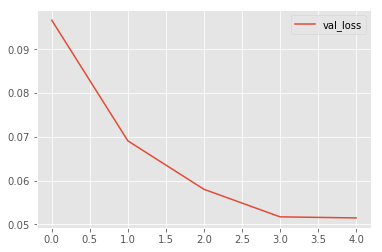

In [24]:
sns.lineplot(data = hist['val_loss'], label = 'val_loss')

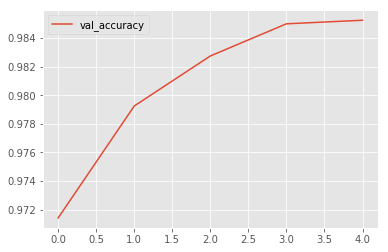

In [25]:
sns.lineplot(data = hist['val_acc'], label = 'val_accuracy')

#### 7. Test the model


In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test Accuracy: ", test_acc)

10000/10000 [==============================] - 5s 509us/step
Test Accuracy:  0.9847


Testing data accuracy is 98.5%

#### 8. Make Predictions

In [29]:
# Look at top five samples of testing dataset
for i in range(5):
    preds = model.predict(test_images)[i]
    print(np.argmax(preds))

7
2
1
0
4
